# Кошель Олена КІ-21

GradientBoostingClassifier. Розглянути рiзнi значення параметрiв learning_rate, subsample та max_features.

Початковi данi:
(а) dataset_Malicious_and_Benign_Websites.csv

### Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

sklearn.ensemble.HistGradientBoostingClassifier is a much faster variant of this algorithm for intermediate datasets (n_samples >= 10_000).


#### Подібно до AdaBoost градієнтний бустинг послідовно додає прогнозатори до ансамблю, причому кожний прогнозатор коригує свого попередника. Відмінність від AdaBoost полягає в тому, що замість налаштування ваг прикладів на кожній ітерації, алгоритм градієнтного бустингу налаштовує новий прогнозатор на залишкові помилки (residual errors), допущені попереднім прогнозатором.

Прогноз на новому прикладізнаходять як суму прогнозів за всіма моделями. Градієнтний бустинг будує прогнозну модель у формі ансамблю слабких прогнозних моделей, зазвичай дерев рішень.

Мета будь-якого алгоритму навчання з учителем – визначити функцію втрат та мінімізувати її.

Отже, у градієнтному бустингу прогнози оновлюються таким чином, щоб сума відхилень прямувала до нуля, і прогнозні значення були близькими до реальних.

### Праметри:

1) **subsample = float, default=1.0**

Частка вибірок, яку буде використано для підбору індивідуальних базових учнів. Якщо менше 1.0, це призводить до стохастичного підсилення градієнта. subsample взаємодіє з параметром n_estimators. 

Вибір subsample < 1.0 призводить до зменшення дисперсії та збільшення зсуву. Значення повинні бути в діапазоні (0.0, 1.0].

2) **learning_rate = float, default=0.1**

Швидкість навчання зменшує внесок кожного дерева на величину learning_rate. Існує компроміс між learning_rate та n_estimators. Значення мають бути в діапазоні [0.0, inf).

3) **max_features{'sqrt', 'log2'}, int або float, default=None**

Кількість ознак, які слід враховувати при пошуку найкращого розбиття:

Якщо int, то значення повинні бути в діапазоні [1, inf).

Якщо float, значення повинні бути в діапазоні (0.0, 1.0], і ознаки, що враховуються при кожному розбитті, будуть max(1, int(max_features * n_features_in_)).

Якщо 'sqrt', то max_features=sqrt(n_features).

Якщо 'log2', то max_features=log2(n_features).

Якщо None, то max_features=n_features.

Вибір max_features < n_features призводить до зменшення дисперсії та збільшення зміщення.

Зауваження: пошук розбиття не припиняється доти, доки не буде знайдено хоча б одне допустиме розбиття вибірок вузлів, навіть якщо для цього потрібно ефективно перевірити більше, ніж max_features ознак.

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

data = pd.read_csv('dataset.csv')
data = data.dropna()

numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,B0_62,160,29,UTF-8,None,36829.0,US,CA,14/08/1997 0:00,14/06/2016 0:00,...,3,7,2402,25,22,4491,2900,25,6.0,0
1769,B0_2237,161,23,iso-8859-1,Apache/2.4.18 (Ubuntu),417.0,None,None,23/11/2010 0:00,20/11/2015 0:00,...,7,2,582,7,11,752,582,7,0.0,0
1774,B0_156,183,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,NY,26/06/1997 0:00,18/11/2014 0:00,...,2,7,2062,30,26,8161,2742,30,8.0,0
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0


In [225]:
independent_variables = numerical_columns
target_variable = 'Type'
X = data[independent_variables]
y = data[target_variable]
X.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


## Тут ми спробуємо візуалізувати деякі дані (не тільки числові) і подивитися, як вони співвідносяться з типом (чи є веб-сайт доброякісним або злоякісним).

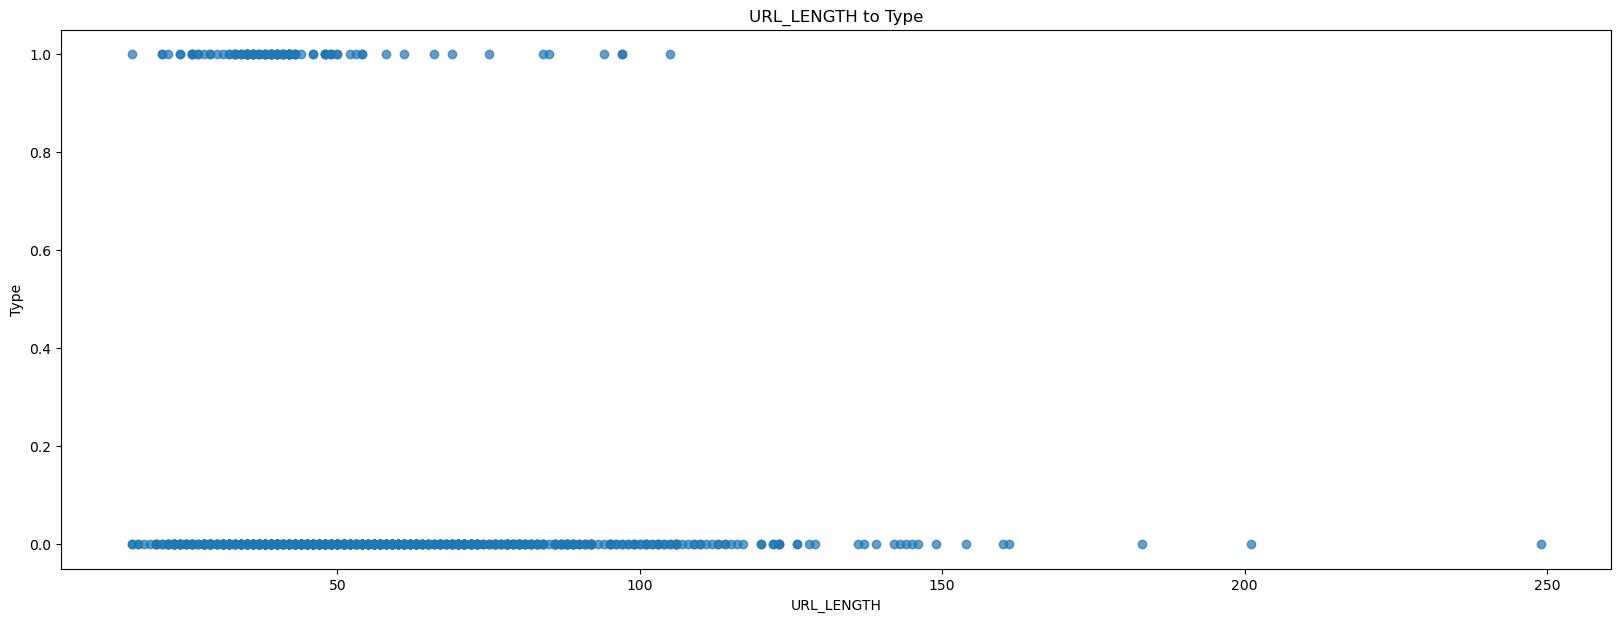

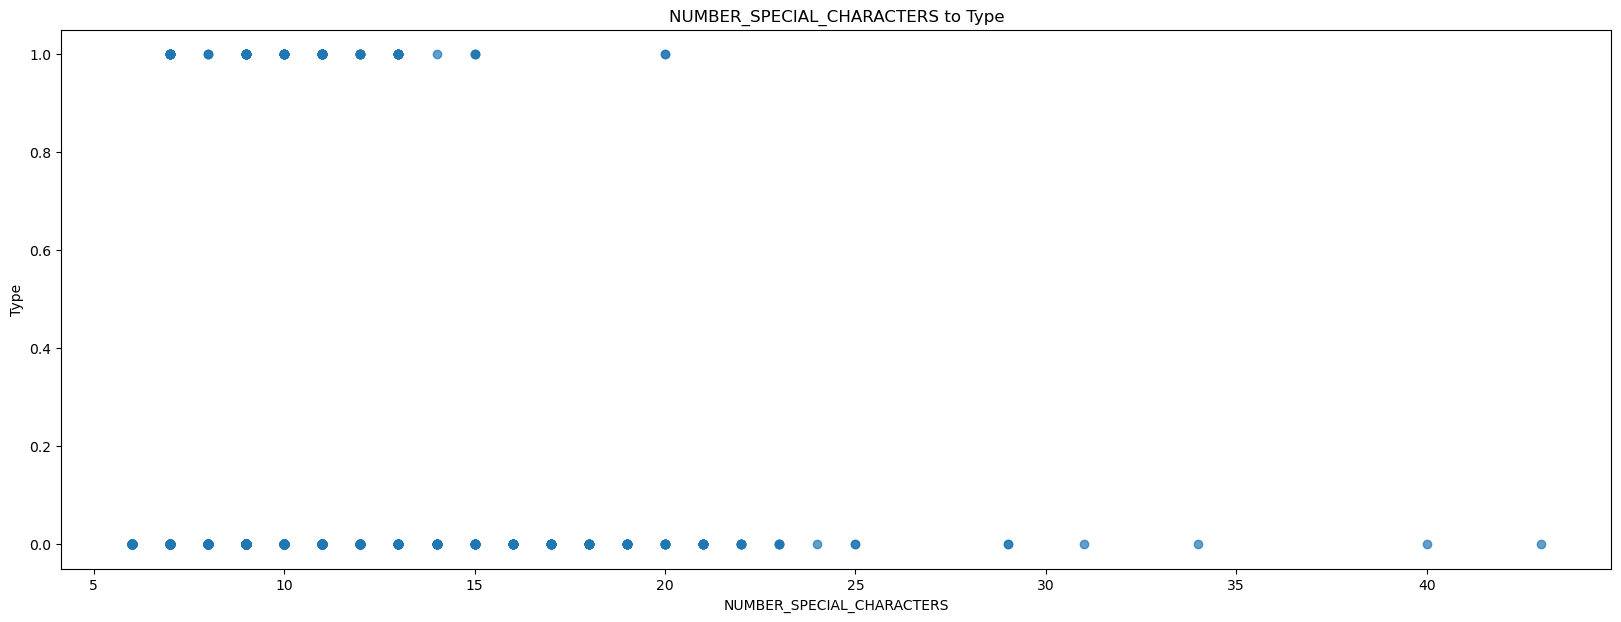

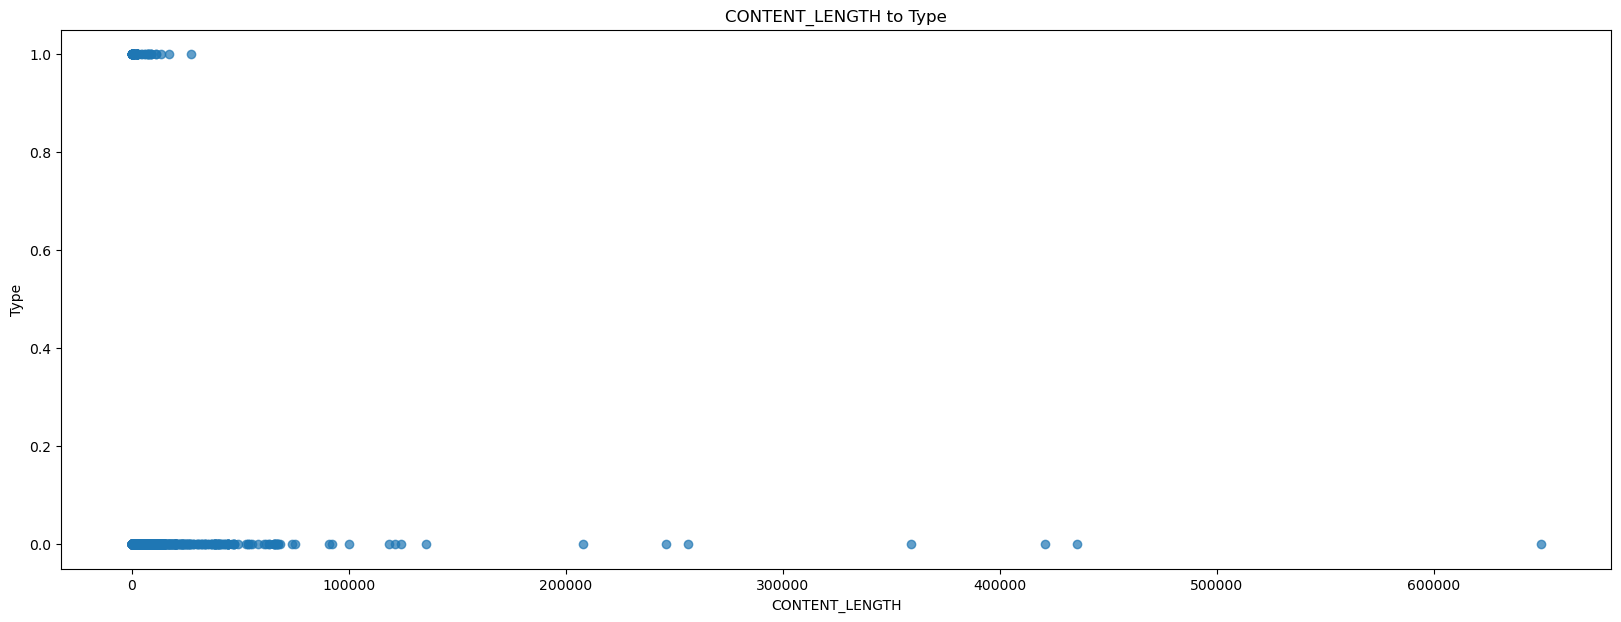

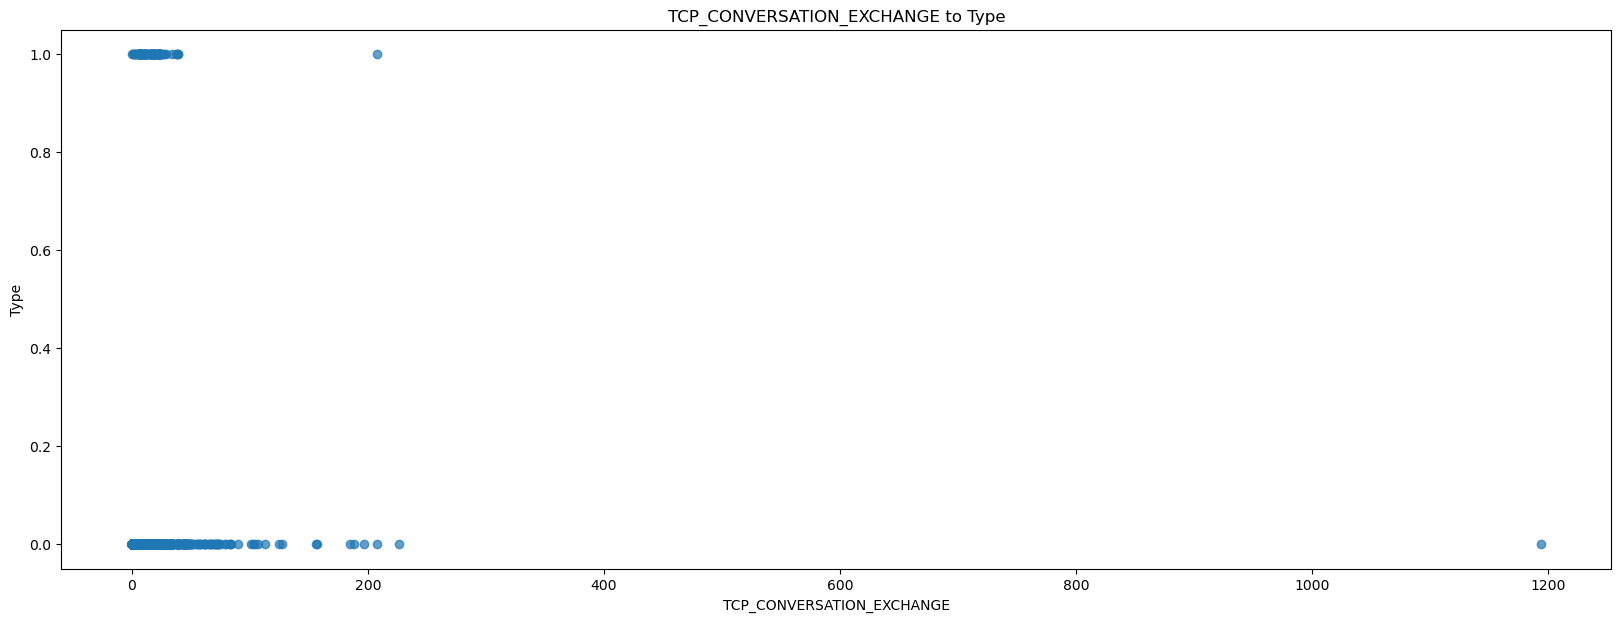

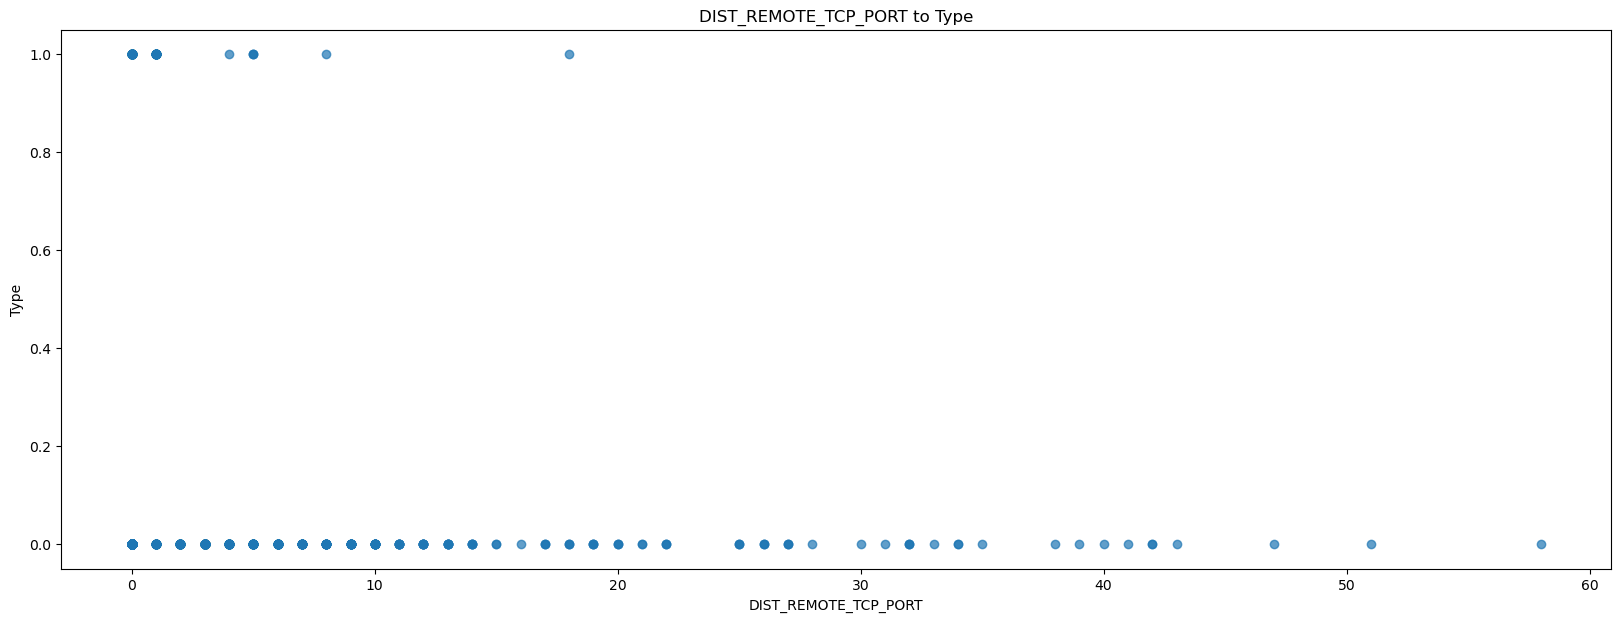

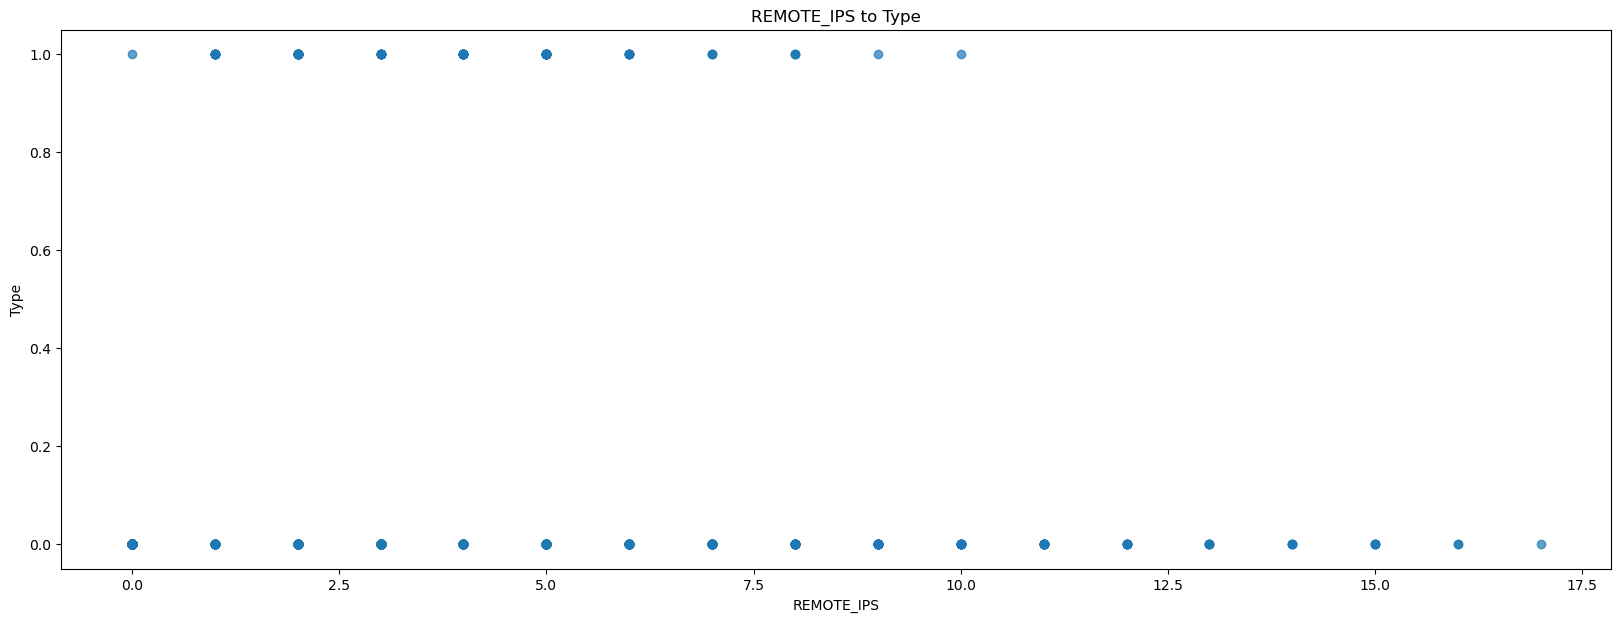

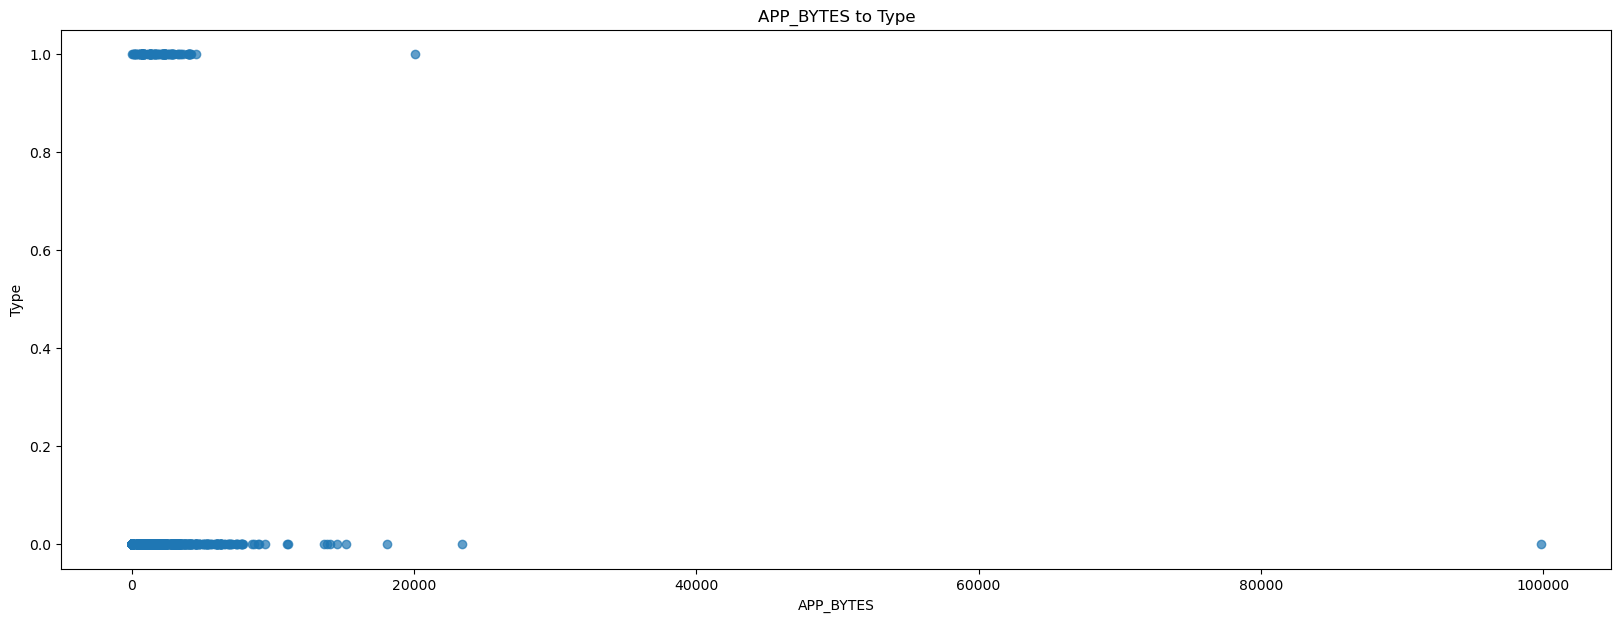

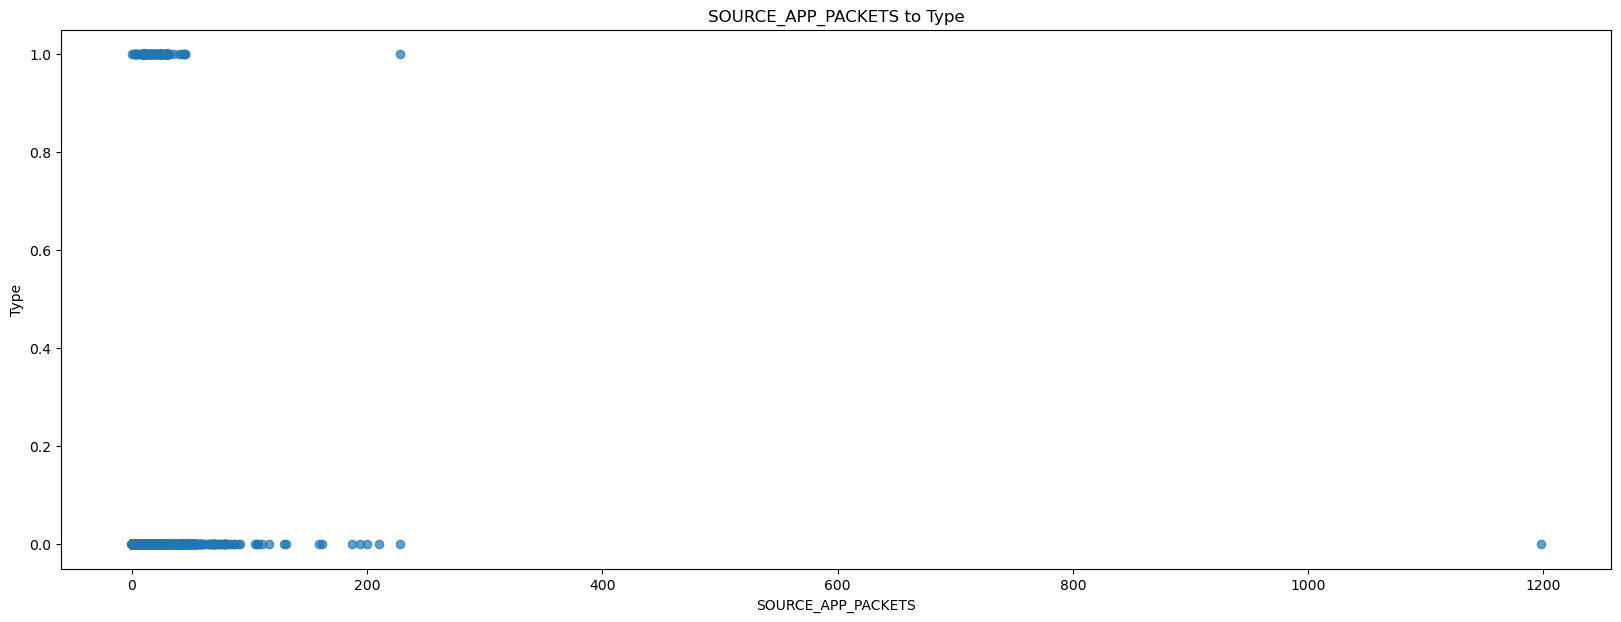

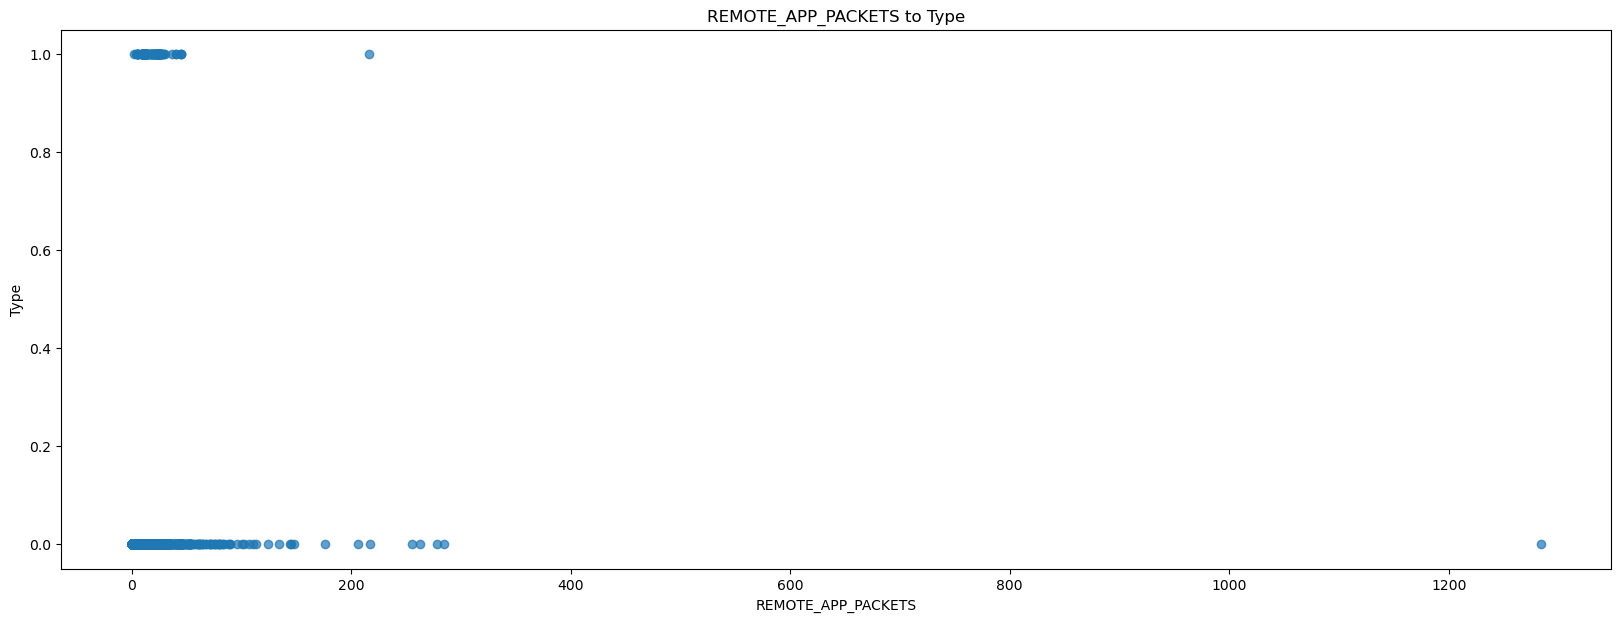

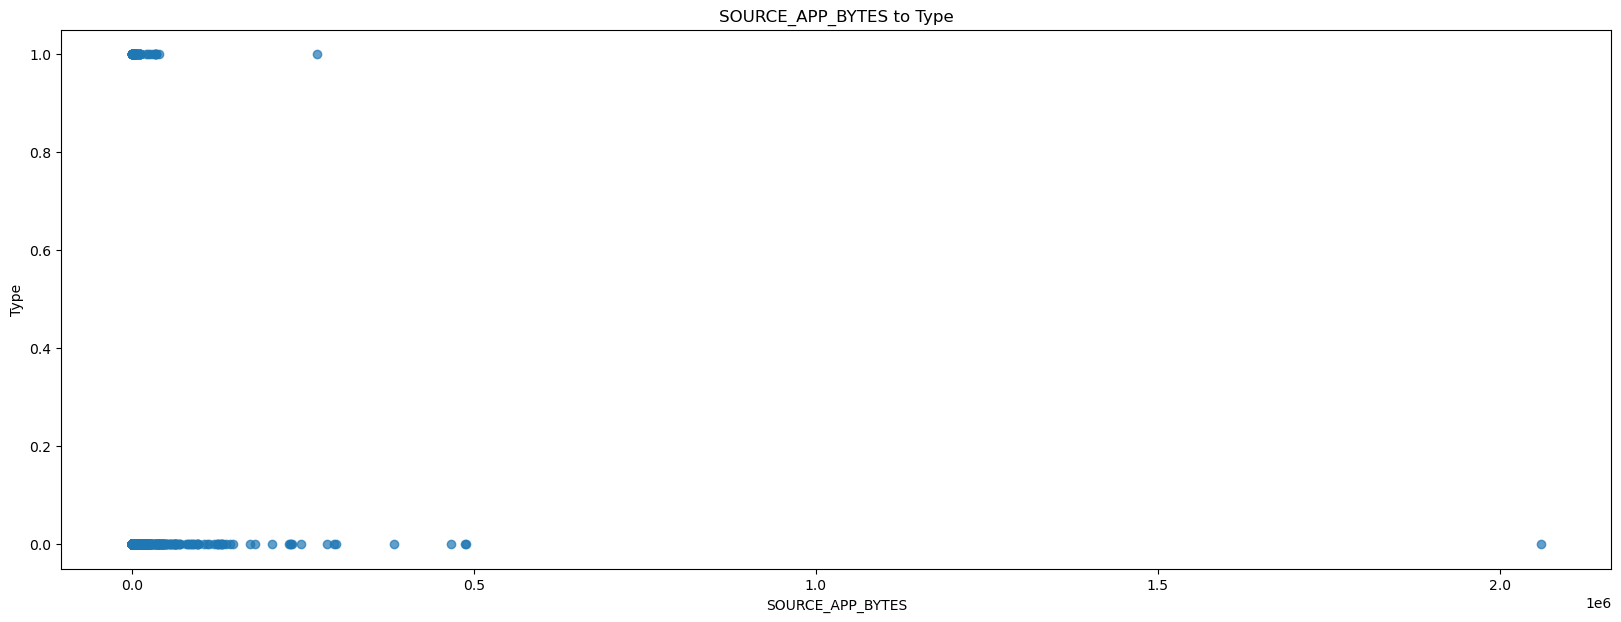

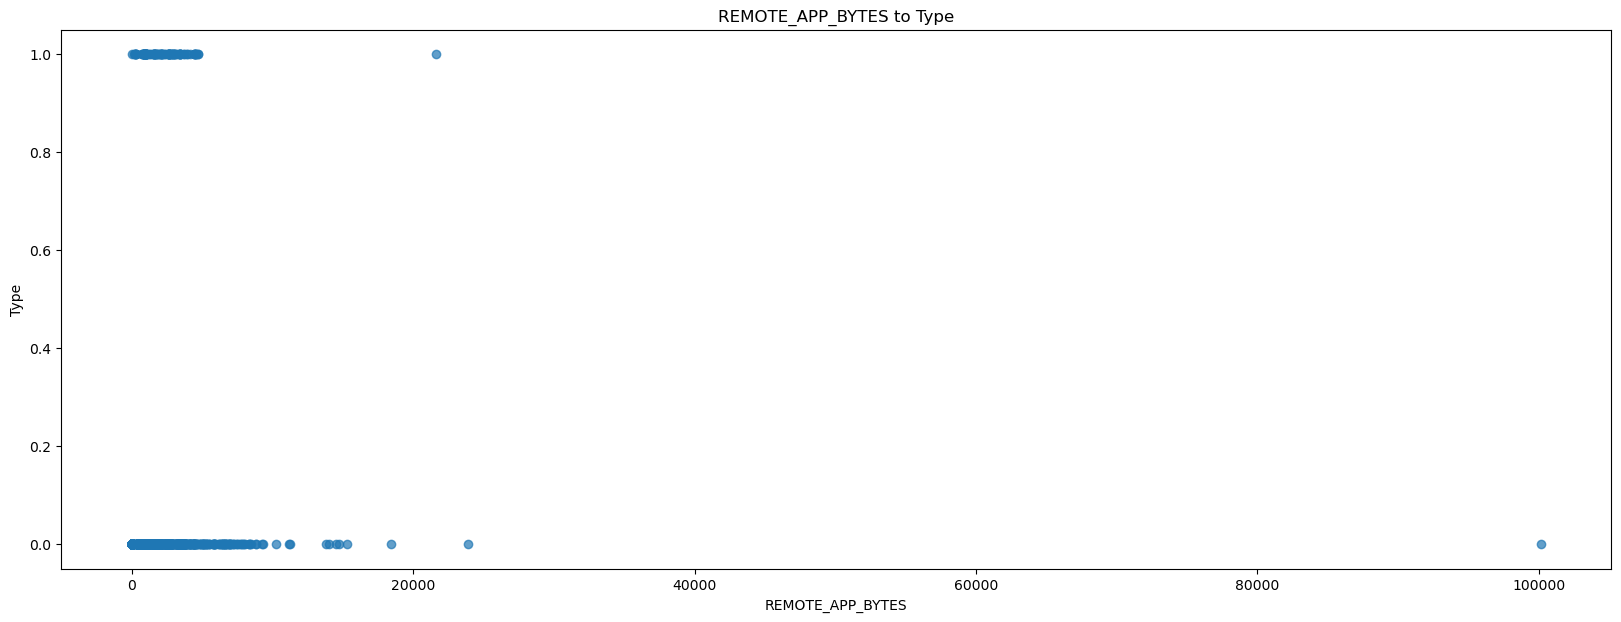

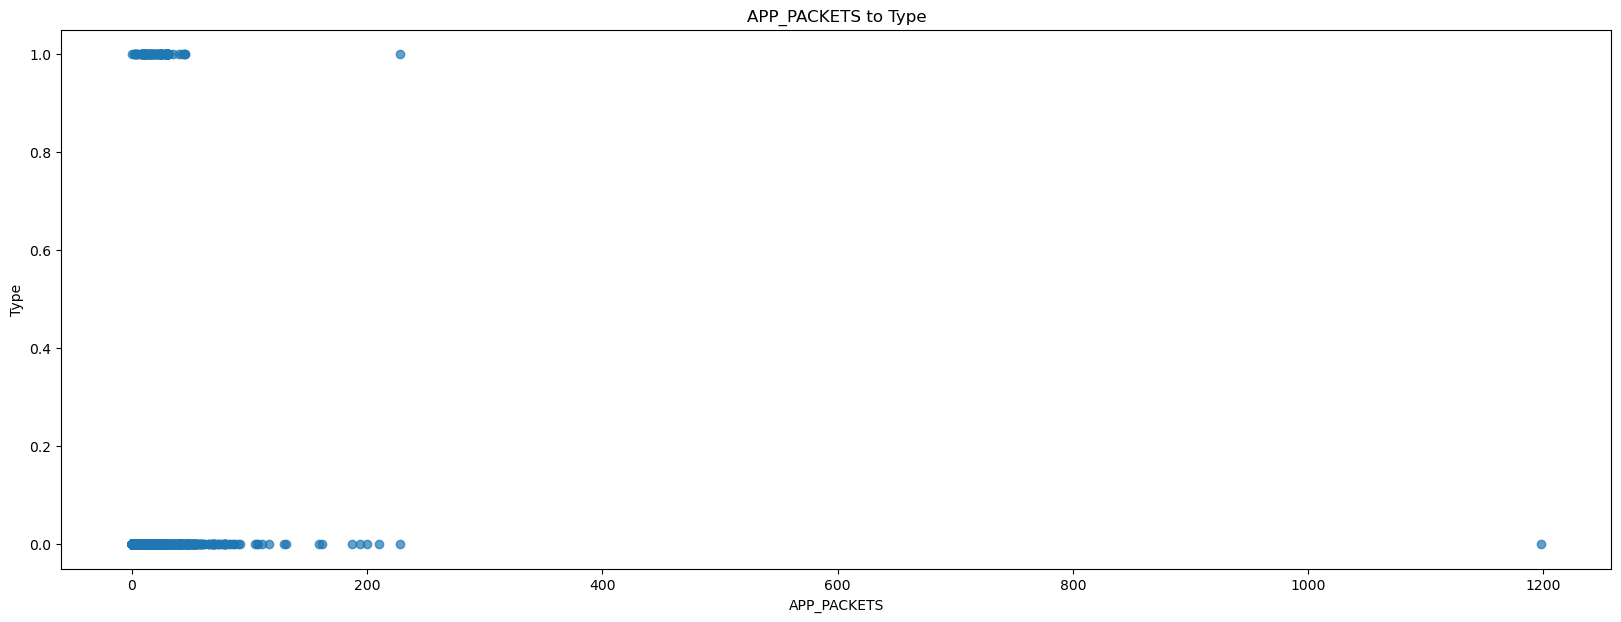

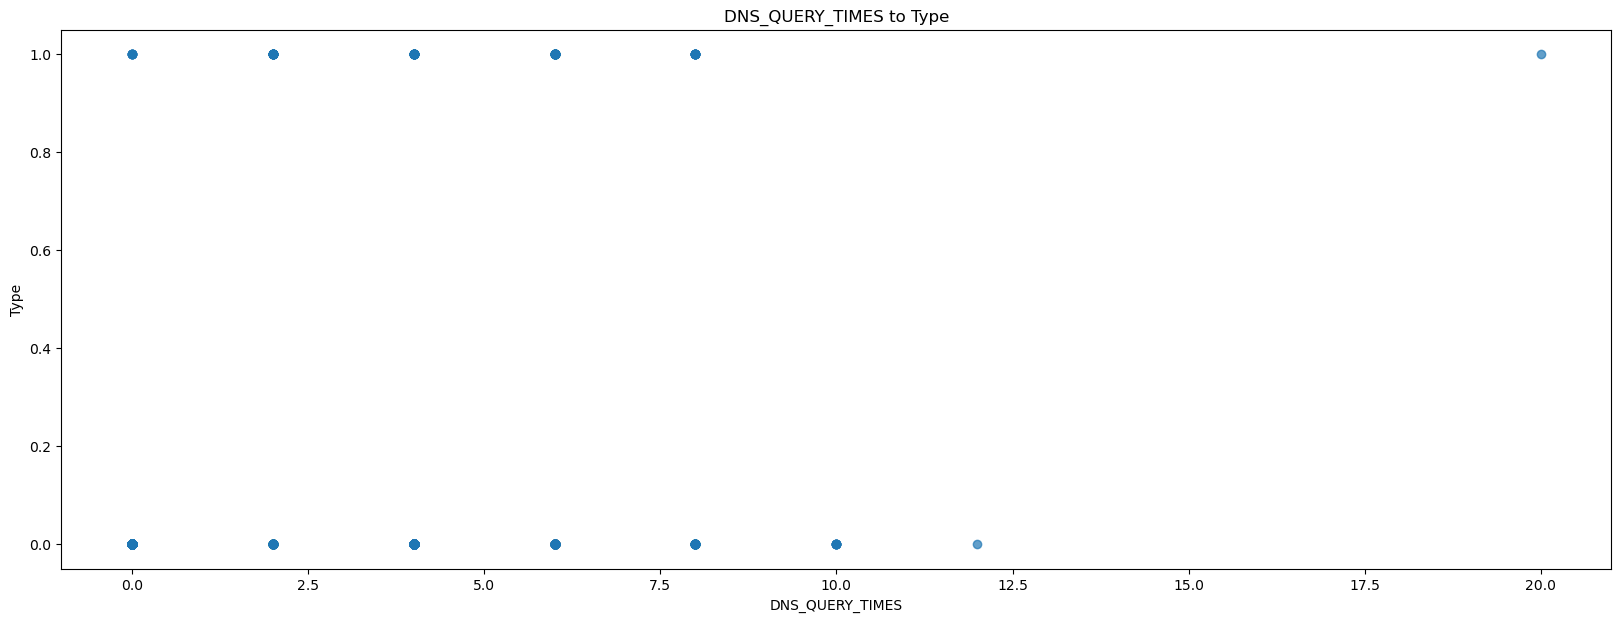

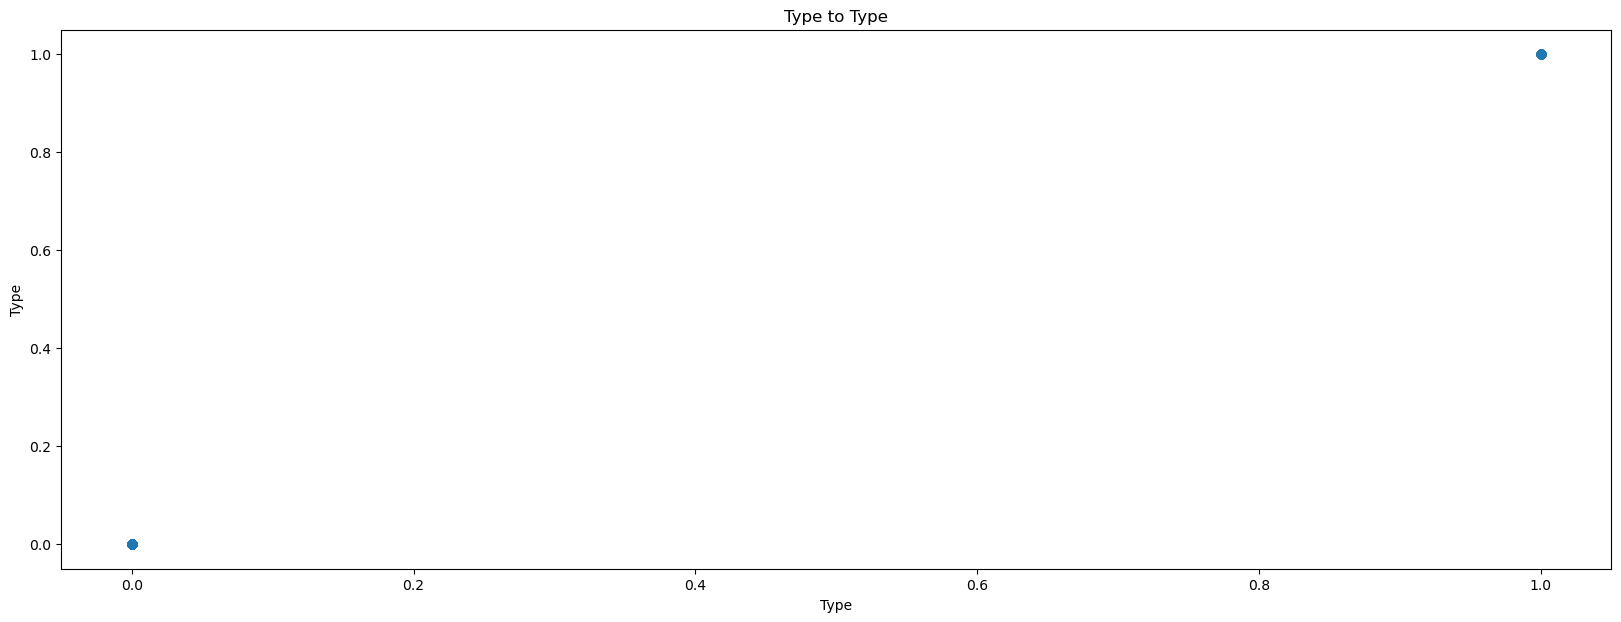

In [226]:
for i in numerical_columns:    
    plt.figure(figsize=(20, 7))
    plt.scatter(data[i], y, alpha=0.7)
    plt.title(f'{i} to Type')
    plt.xlabel(f'{i}')
    plt.ylabel('Type')

### Як бачимо, лише за цією метрикою не можна визначити, чи є сайт доброякісним або шкідливим. Однак зауважте, що для поля DNS_QUERY_TIMES шкідливих сайтів спостерігається відхилення від норми.

### Тепер давайте перевіримо, як країни співвідносяться з типом веб-сайту.

<AxesSubplot:xlabel='WHOIS_COUNTRY'>

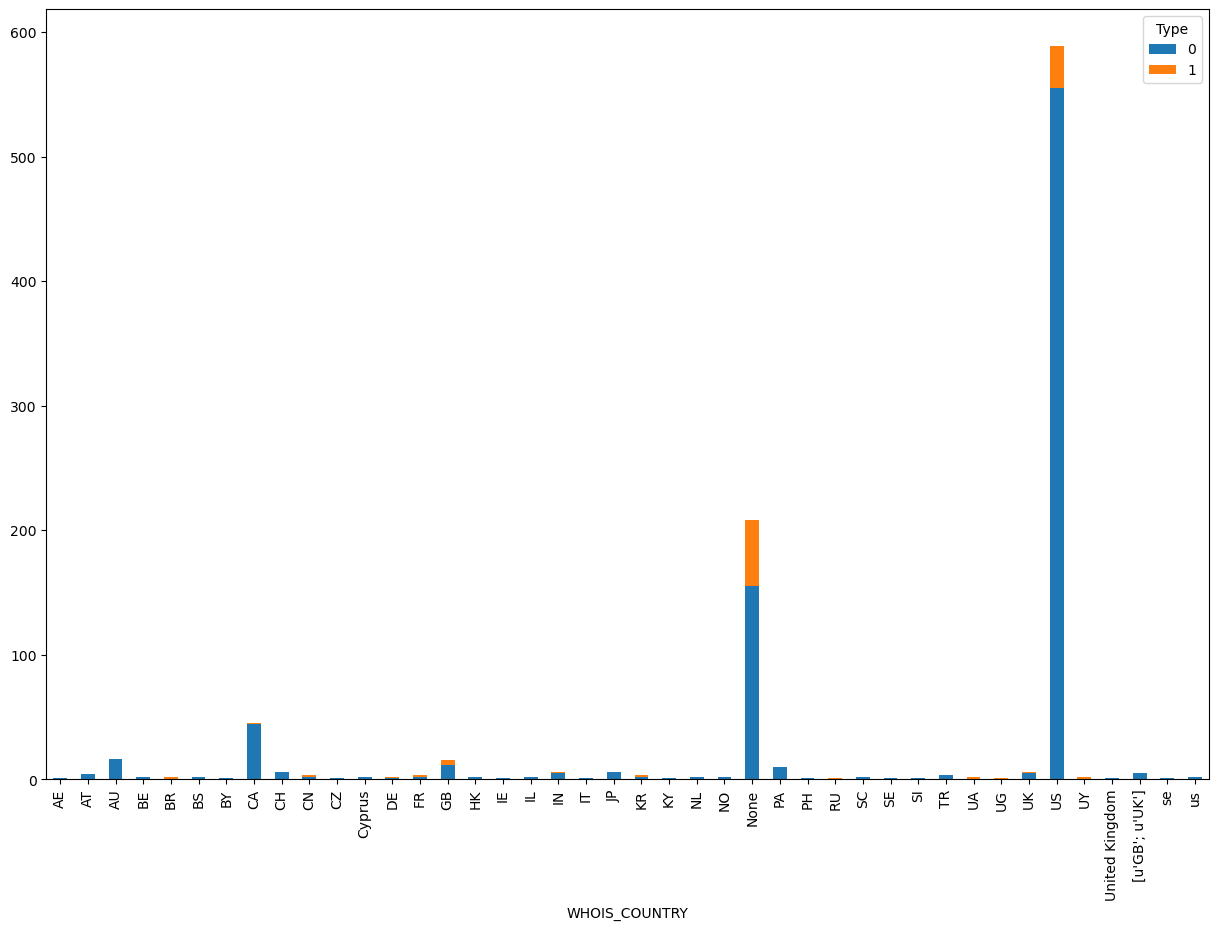

In [227]:
country_type_group = data.groupby(['WHOIS_COUNTRY', 'Type'])
country_type_group.size().unstack().fillna(0.0).plot(kind='bar', stacked=True, figsize=(15,10))

## Оскільки більшість веб-сайтів у наборі даних є американськими, при навчанні моделі може виникнути упередженість. Слід зазначити, що країна BR має 2 шкідливих входи і жодного доброякісного входу. Росія, UG, UA, UY, BR також мають шкідливі входи і жодного доброякісного веб-сайту. З іншого боку, BY, BS, AE, AT, AU, BE, CH, CZ і Кіпр мають записи про доброякісні веб-сайти, але не мають жодного шкідливого.

### Існує також багато шкідливих веб-сайтів з типом країни "Немає". Таким чином, важко сказати, що одна країна має найбільше шкідливих веб-сайтів. Через упереджену природу набору даних цей показник сам по собі не може бути хорошим (він може схилятися до США і визначати шкідливі сайти з інших країн).

In [228]:
def evaluate_model(true_classes, predictions):
    accuracy = metrics.accuracy_score(true_classes, predictions)
    precision = metrics.average_precision_score(true_classes, predictions)
    recall = metrics.recall_score(true_classes, predictions)
    auc = metrics.roc_auc_score(true_classes, predictions)
    f1 = metrics.f1_score(true_classes, predictions)
    print(f"""
    Accuracy: {accuracy:.3f}
    Precision: {precision:.3f}
    Recall: {recall:.3f}
    AUC: {auc:.3f}
    F1 Score: {f1:.3f}
    """
    )

In [229]:
dif_params = [(0.1, 0.1, 'sqrt'), (0.5, 0.05, 'log2'), (2.0, 0.2, None), (100.0, 0.3, 1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for learning_rate, subsample, max_features in dif_params:

    model = GradientBoostingClassifier(learning_rate=learning_rate, subsample=subsample, max_features=max_features)

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print(f'Model with learning_rate = {learning_rate}, subsample = {subsample}, max_features = {max_features}')
    evaluate_model(y_test, predictions)

Model with learning_rate = 0.1, subsample = 0.1, max_features = sqrt

    Accuracy: 1.000
    Precision: 1.000
    Recall: 1.000
    AUC: 1.000
    F1 Score: 1.000
    
Model with learning_rate = 0.5, subsample = 0.05, max_features = log2

    Accuracy: 1.000
    Precision: 1.000
    Recall: 1.000
    AUC: 1.000
    F1 Score: 1.000
    
Model with learning_rate = 2.0, subsample = 0.2, max_features = None

    Accuracy: 1.000
    Precision: 1.000
    Recall: 1.000
    AUC: 1.000
    F1 Score: 1.000
    
Model with learning_rate = 100.0, subsample = 0.3, max_features = 1

    Accuracy: 0.670
    Precision: 0.156
    Recall: 0.684
    AUC: 0.676
    F1 Score: 0.289
    


### Бачимо, що найгірше себе показала модель з параметрами (0.5, 0.05, 'log2'), думаю що це через subsample = 0.05, бо це веде до збільшення зміщення, та зменшення дсперсіїї, як написано у документаціїї. Також гірше ніж інші бачимо, що веде себе остання модель, думаю що це через max_features = 1, що значно менше за n_features(13).

In [230]:
for k in range (2, 10000, 1000):    

    model_k = GradientBoostingClassifier(max_leaf_nodes=k)
    
    start_time = time.time()
    model_k.fit(X_train, y_train)
    end_time = time.time()
    print(f'Time for max_leaf_nodes = {k} model: {end_time - start_time}')

    predictions_k = model_k.predict(X_test)

    accuracy_k = metrics.accuracy_score(y_test, predictions_k)
    print(f'Accuracy with max_leaf_nodes = {k}: {accuracy_k}')

    model_k_minus_1 = GradientBoostingClassifier(max_depth=k-1)

    start_time = time.time()
    model_k_minus_1.fit(X_train, y_train)
    end_time = time.time()
    print(f'Time for max_depth = {k-1} model: {end_time - start_time}')

    predictions_k_minus_1 = model_k_minus_1.predict(X_test)

    accuracy_k_minus_1 = metrics.accuracy_score(y_test, predictions_k_minus_1)
    print(f'Accuracy with max_depth = {k-1}: {accuracy_k_minus_1}\n')

Time for max_leaf_nodes = 2 model: 0.05700874328613281
Accuracy with max_leaf_nodes = 2: 1.0
Time for max_depth = 1 model: 0.05702805519104004
Accuracy with max_depth = 1: 1.0

Time for max_leaf_nodes = 1002 model: 0.056000471115112305
Accuracy with max_leaf_nodes = 1002: 1.0
Time for max_depth = 1001 model: 0.05997014045715332
Accuracy with max_depth = 1001: 1.0

Time for max_leaf_nodes = 2002 model: 0.06102919578552246
Accuracy with max_leaf_nodes = 2002: 1.0
Time for max_depth = 2001 model: 0.0579991340637207
Accuracy with max_depth = 2001: 1.0

Time for max_leaf_nodes = 3002 model: 0.05600118637084961
Accuracy with max_leaf_nodes = 3002: 1.0
Time for max_depth = 3001 model: 0.05702614784240723
Accuracy with max_depth = 3001: 1.0

Time for max_leaf_nodes = 4002 model: 0.05900216102600098
Accuracy with max_leaf_nodes = 4002: 1.0
Time for max_depth = 4001 model: 0.057028770446777344
Accuracy with max_depth = 4001: 1.0

Time for max_leaf_nodes = 5002 model: 0.05597114562988281
Accuracy

### Бачимо, що точність всюди однакова, але час зовсім трохи менший для max_leaf_nodes, при меншому кроці та пороговому значенні він майже непомітний. Але при збільшенні k час таки трохи змінюється. Отже гіпотеза не стверджується, оскільки в ній сказано, що час **значно** зменшується, а в нас зміна невелика. 

#### В якостi base_estimator / estimators використати одну/ кiлька моделей iз параметрами по умовчанню: дерев рiшень, логiстичної регресiї, svm тощо. Цю задачу виконати не вийде для GradientBoostingClassifier, оскільки тут за замовчуванням використовується дерево рішень.

Time for ensemble model: 0.005
Bias ensemble: 0.000
Variance ensemble: 0.088

Time for single model: 0.001
Bias single: 0.000
Variance single: 0.088



Time for ensemble model: 0.008
Bias ensemble: 0.000
Variance ensemble: 0.088

Time for single model: 0.001
Bias single: 0.000
Variance single: 0.088



Time for ensemble model: 0.029
Bias ensemble: 0.000
Variance ensemble: 0.088

Time for single model: 0.002
Bias single: 0.000
Variance single: 0.088



Time for ensemble model: 0.057
Bias ensemble: 0.000
Variance ensemble: 0.088

Time for single model: 0.002
Bias single: 0.000
Variance single: 0.088



Time for ensemble model: 0.102
Bias ensemble: 0.000
Variance ensemble: 0.088

Time for single model: 0.001
Bias single: 0.000
Variance single: 0.088



Time for ensemble model: 0.123
Bias ensemble: 0.000
Variance ensemble: 0.088

Time for single model: 0.002
Bias single: 0.000
Variance single: 0.088





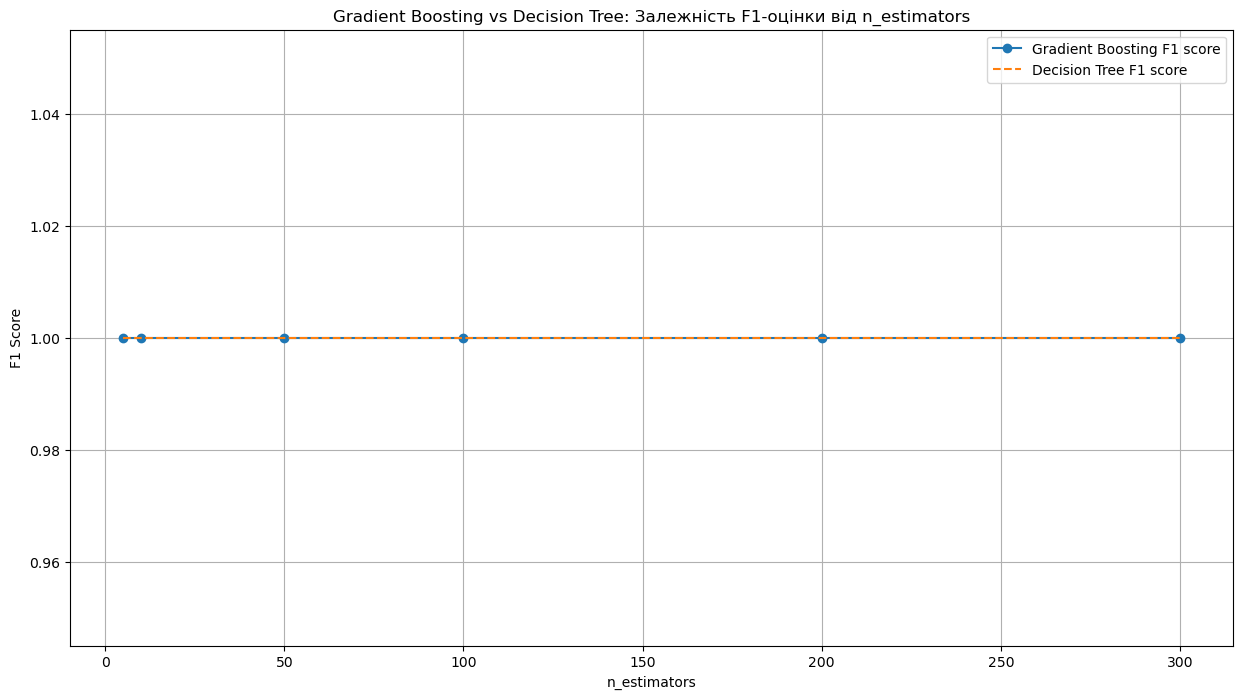

In [231]:

n_estimators_values = [5, 10, 50, 100, 200, 300]  
gb_f1_scores = []
dt_f1_scores = []

for n in n_estimators_values:
    
    gb_model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = time.time()
    gb_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'Time for ensemble model: {end_time - start_time:.3f}')
    
    gb_pred = gb_model.predict(X_test)
    gb_f1 = metrics.f1_score(y_test, gb_pred)
    gb_f1_scores.append(gb_f1)
    
    bias = np.mean(gb_pred - y_test)
    print(f'Bias ensemble: {bias:.3f}')

    variance = np.var(gb_pred)
    print(f'Variance ensemble: {variance:.3f}\n')
    
    dt_model = DecisionTreeClassifier(random_state=42)
    start_time = time.time()
    dt_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'Time for single model: {end_time - start_time:.3f}')

    dt_pred = dt_model.predict(X_test)
    dt_f1 = metrics.f1_score(y_test, dt_pred)
    dt_f1_scores.append(dt_f1)

    bias = np.mean(dt_pred - y_test)
    print(f'Bias single: {bias:.3f}')

    variance = np.var(dt_pred)
    print(f'Variance single: {variance:.3f}\n\n\n')

plt.figure(figsize=(15, 8))

plt.plot(n_estimators_values, gb_f1_scores, label='Gradient Boosting F1 score', marker='o')

# Графік для дерева рішень
plt.plot(n_estimators_values, dt_f1_scores, label='Decision Tree F1 score', linestyle='--')

plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('Gradient Boosting vs Decision Tree: Залежність F1-оцінки від n_estimators')
plt.legend()
plt.grid(True)
plt.show()

### Вище наведено графік залежності F1 від кількості окремих моделей(дерев рішень). Друга пряма, як прогнозувалось, є горизонтальною, це оцінка окремого дерева рішень. Як бачимо, оцінки в цілому незмінні, модель "ідеальна".

 ## Побудова границь рішень

In [232]:
X_test

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
422,39,10,216.0,8,0,1,809,12,11,1321,1101,12,4.0,1
856,49,12,2211.0,12,8,1,2037,16,16,6187,2355,16,4.0,1
1513,82,17,324.0,5,4,2,498,5,6,376,498,5,0.0,0
1006,54,11,17140.0,29,1,7,4558,31,37,26259,4724,31,2.0,1
122,29,7,7314.0,34,0,2,2934,40,40,34995,3416,40,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,154,21,11104.0,33,10,8,3764,41,23,7356,4412,41,8.0,0
1045,55,12,66702.0,0,0,0,0,0,0,0,0,0,0.0,0
1392,71,14,337.0,35,14,7,4515,43,28,12970,5105,43,8.0,0
50,24,6,324.0,6,4,4,564,6,8,508,564,6,0.0,0


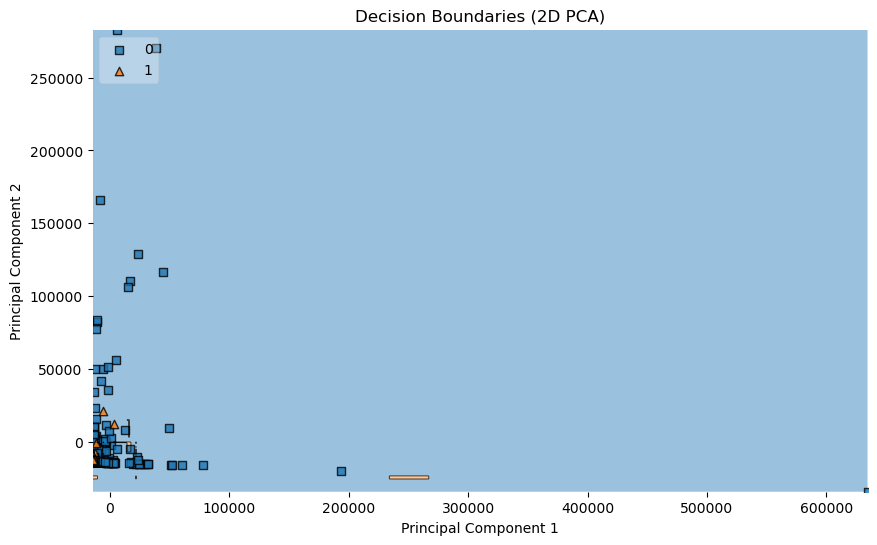

In [233]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X_train_pca, y_train)
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_pca, y_test.values, clf=gb_classifier, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries (2D PCA)')
plt.show()

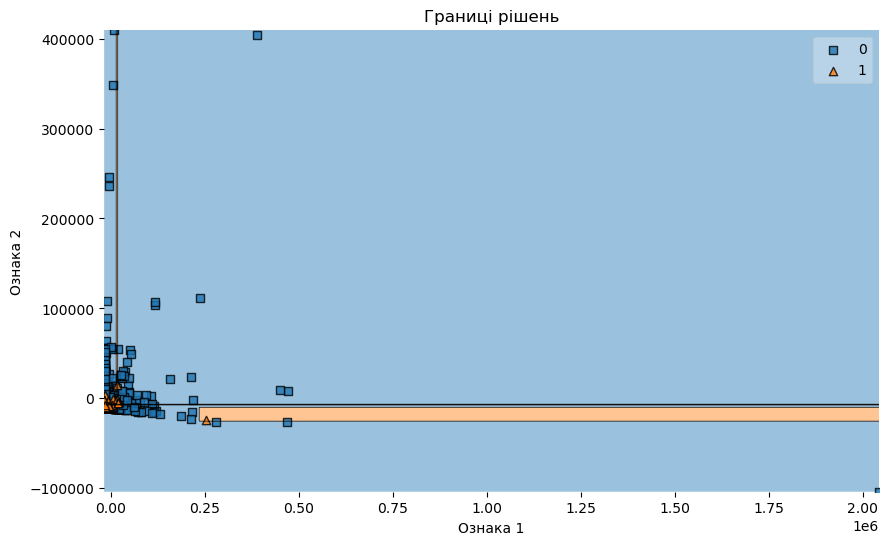

In [234]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_pca, y_train)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_pca, y_train.values, clf=dt_model)
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Границі рішень')
plt.show()

## Як бачимо PCA призводить до трохи незручних графіків, тож побудуємо кілька границь рішень для окремих колонок, чисто подивитись як вийде

In [235]:
def dataframe_to_array(target, column_num):
    target = pd.DataFrame(target)
    a = target.index.values
    b = target[target.columns.tolist()[column_num]].to_numpy()
    array1_2d = a.reshape(-1, 1)
    array2_2d = b.reshape(-1, 1)
    combined_array = np.concatenate((array1_2d, array2_2d), axis=1)
    return combined_array

In [236]:
n_colunm = dataframe_to_array(X_train, 0)

<AxesSubplot:>

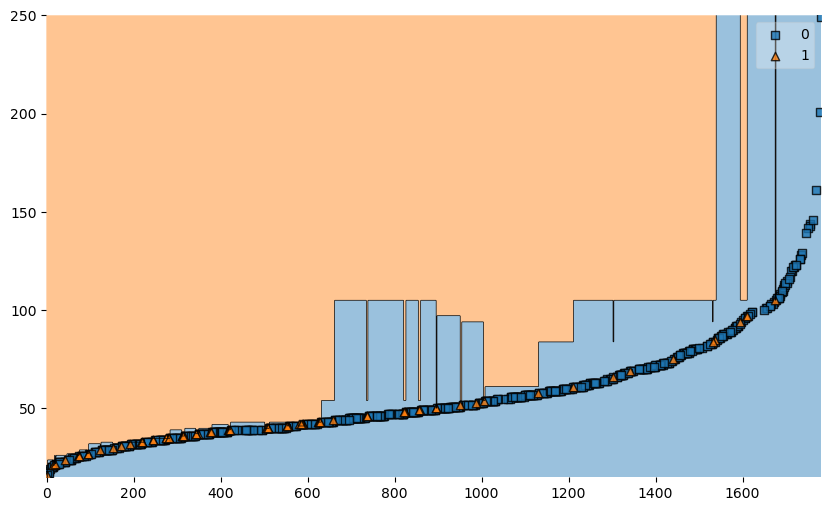

In [237]:
plt.figure(figsize=(10, 6))
gb_classifier.fit(n_colunm, y_train)
plot_decision_regions(n_colunm, y_train.values, clf=gb_classifier)

### Не сказав би, що будувати границі рішень доцільно для даного датасету, оскільки чіткої картини ми не побачили ні в якому випадку, ні в тих, що нижче, ні  в тих що вище

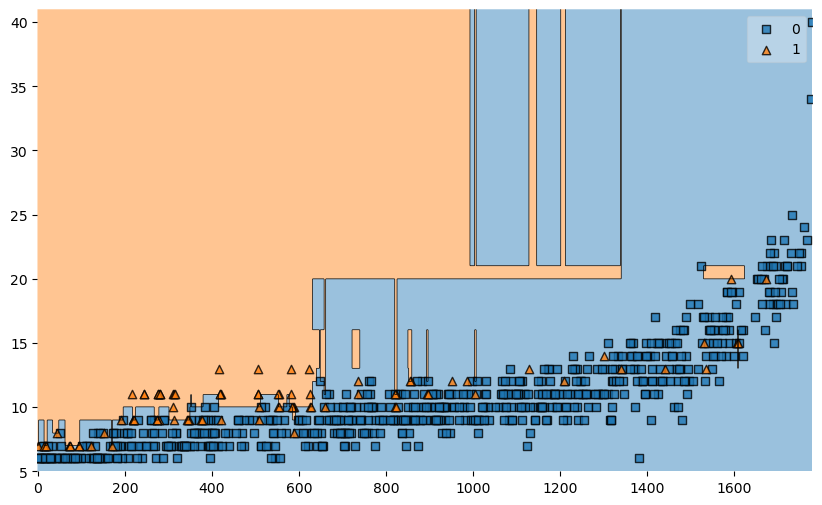

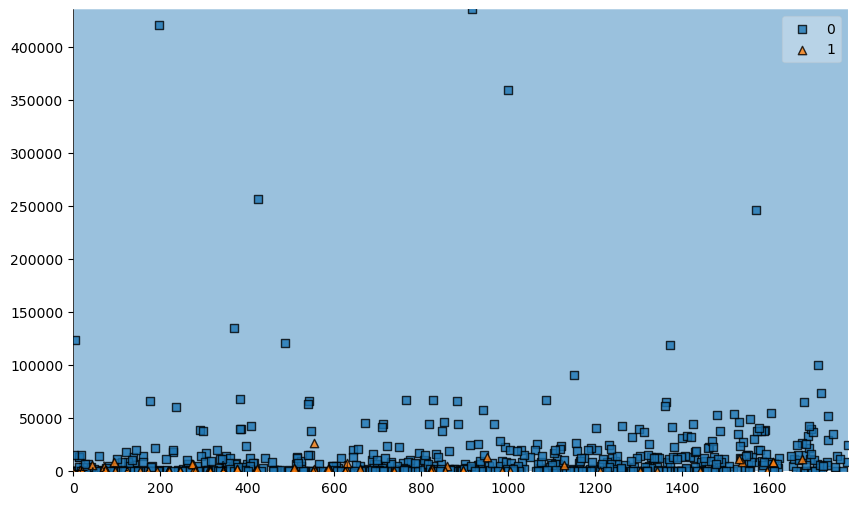

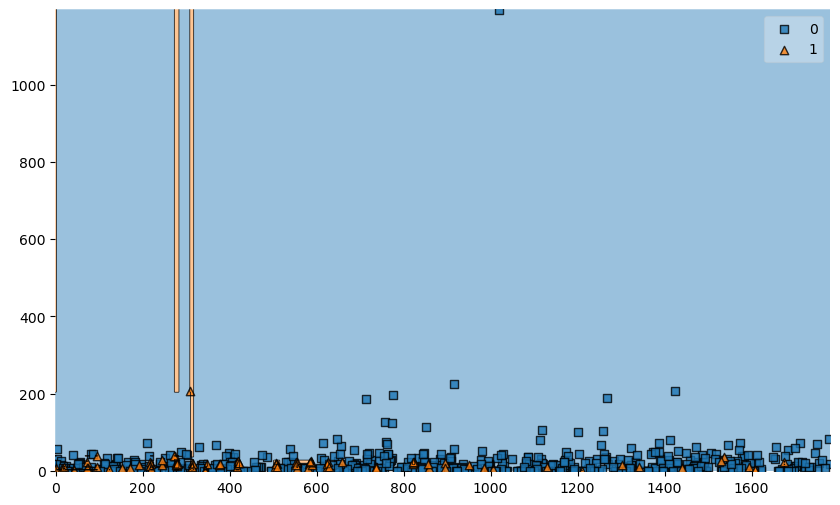

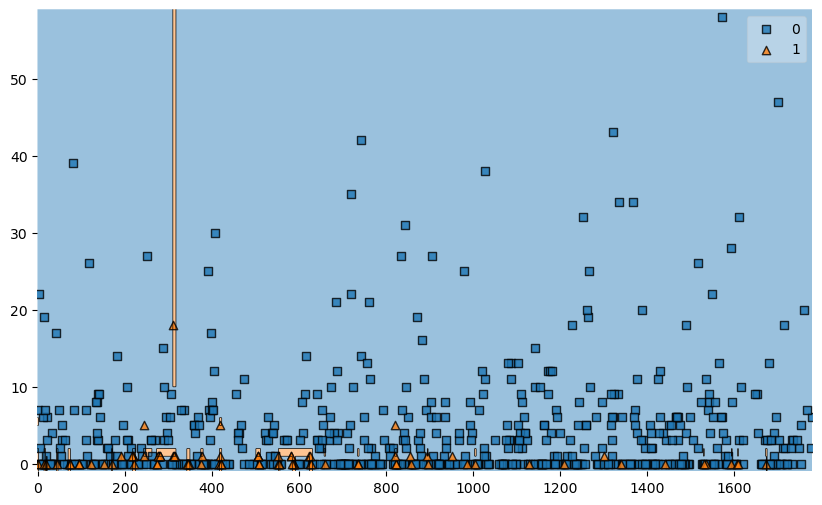

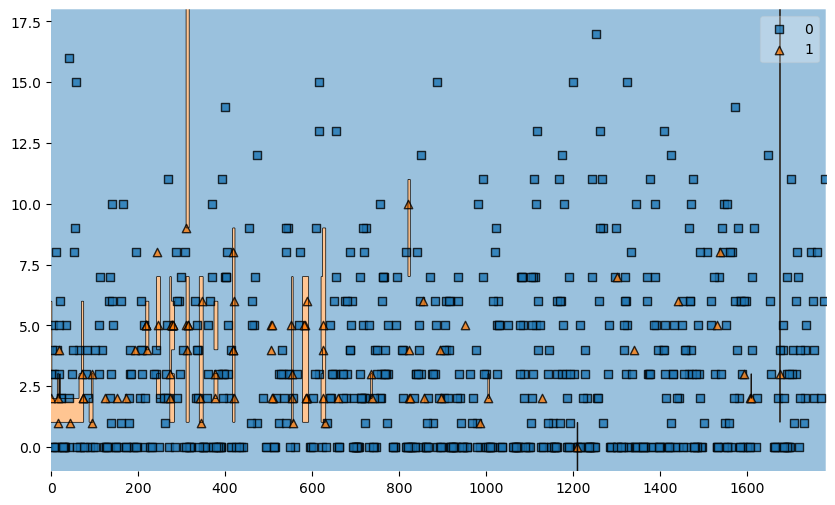

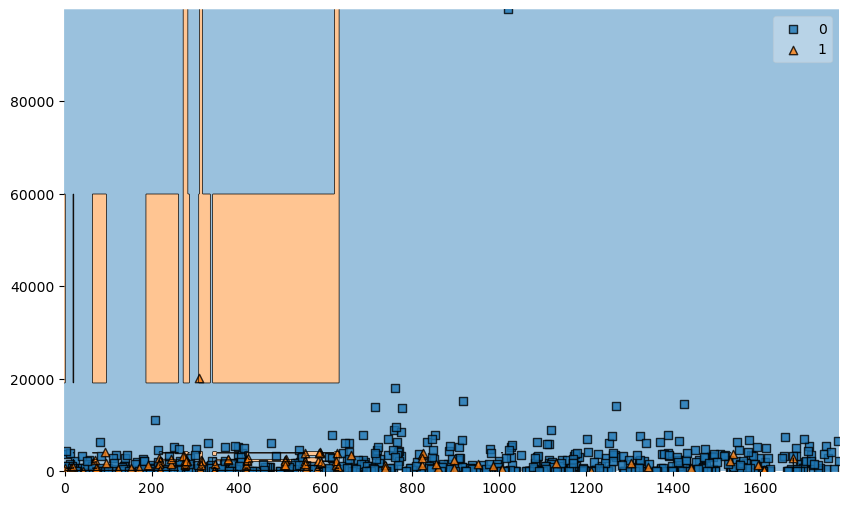

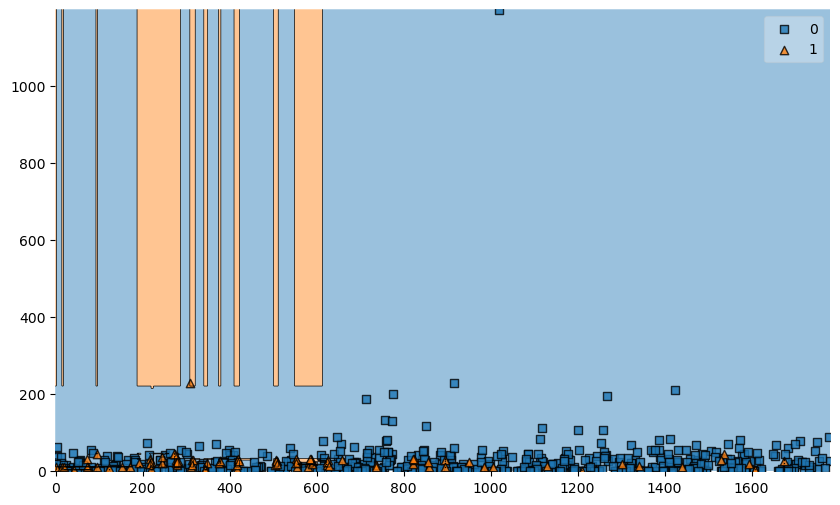

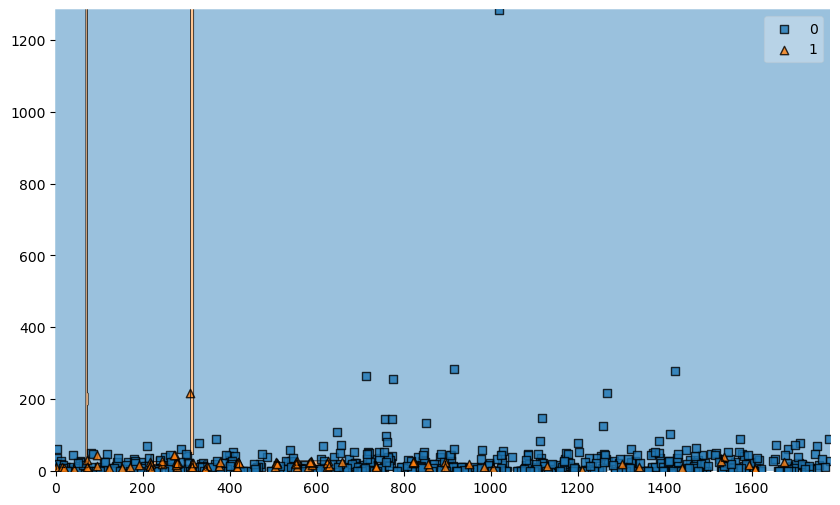

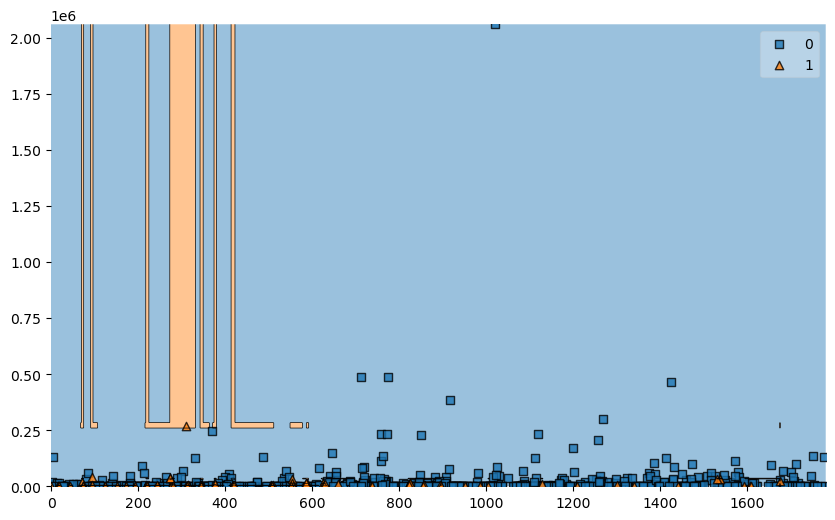

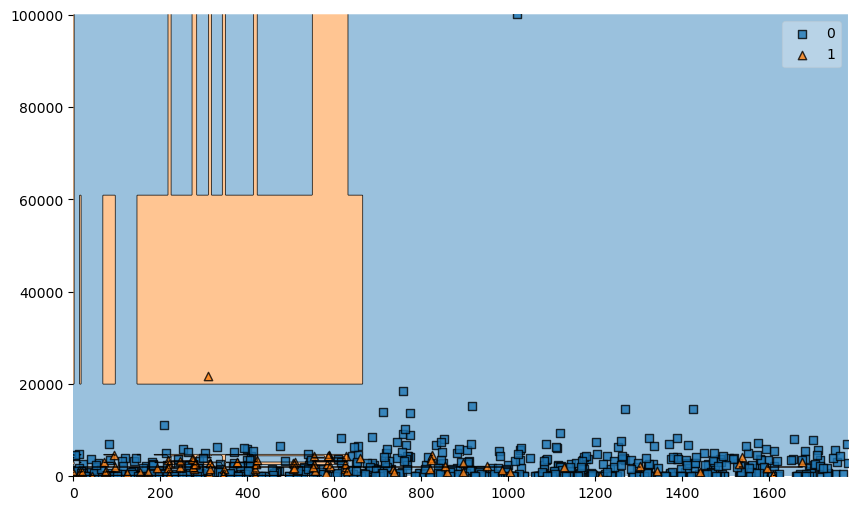

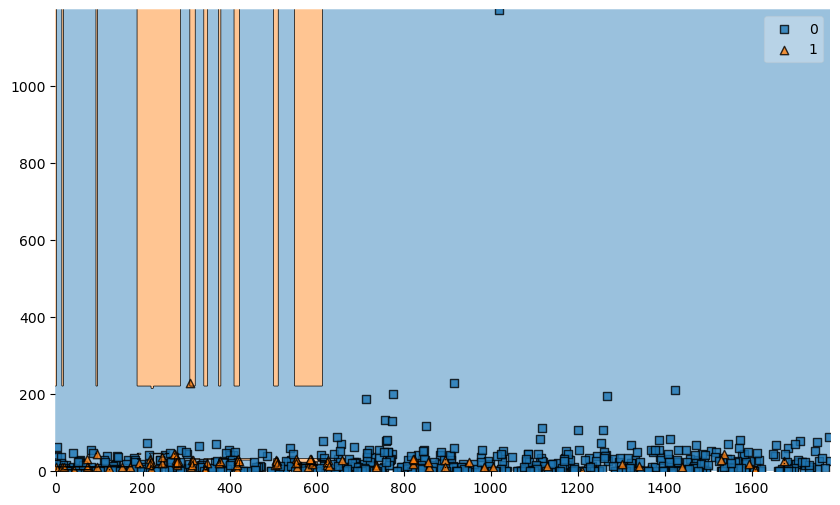

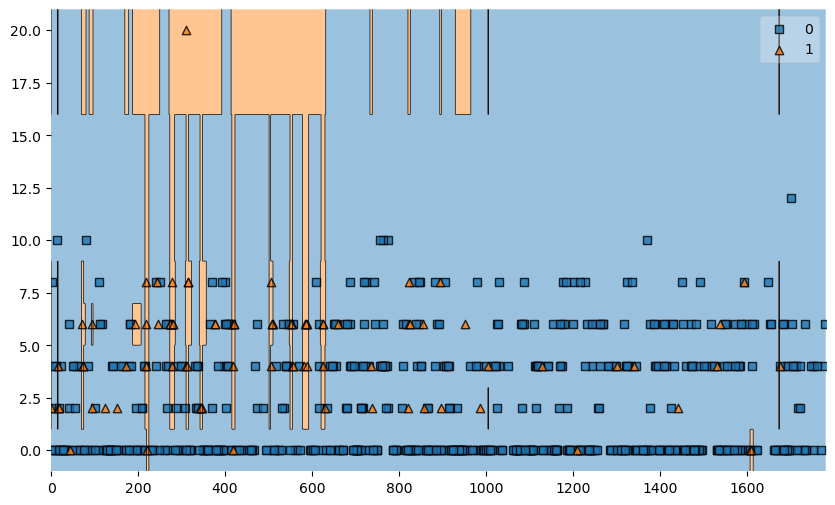

In [238]:
columns_to_watch = np.arange(1, 13)
for x in range(1, 13, 1):
    n_colunm = dataframe_to_array(X_train, x)
    plt.figure(figsize=(10, 6))
    gb_classifier.fit(n_colunm, y_train)
    plot_decision_regions(n_colunm, y_train.values, clf=gb_classifier)
    plt.show()